In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()

In [5]:
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[df['species'] != 0][['sepal_length','petal_length','species']]

In [8]:
df.head()

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

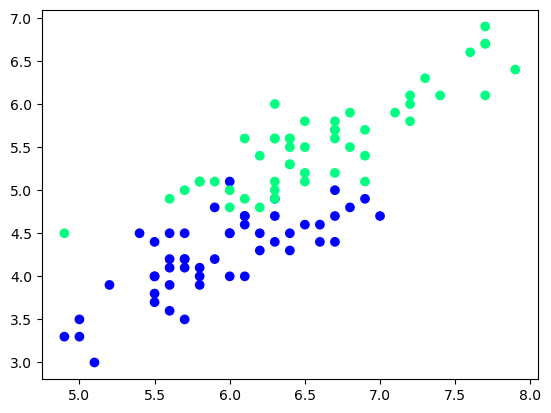

In [10]:
plt.scatter(df['sepal_length'],df['petal_length'],c=df['species'],cmap='winter')

In [11]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_length,petal_length,species
59,5.2,3.9,1
100,6.3,6.0,2
62,6.0,4.0,1
67,5.8,4.1,1
102,7.1,5.9,2
101,5.8,5.1,2
68,6.2,4.5,1
105,7.6,6.6,2
93,5.0,3.3,1
79,5.7,3.5,1


In [12]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal_length,petal_length,species
72,6.3,4.9,1
149,5.9,5.1,2
100,6.3,6.0,2
146,6.3,5.0,2
144,6.7,5.7,2
80,5.5,3.8,1
84,5.4,4.5,1
128,6.4,5.6,2
142,5.8,5.1,2
76,6.8,4.8,1


In [14]:
df_val

,sepal_length,petal_length,species
109,7.2,6.1,2
98,5.1,3.0,1
96,5.7,4.2,1
67,5.8,4.1,1
105,7.6,6.6,2


In [15]:
df_test

,sepal_length,petal_length,species
120,6.9,5.7,2
116,6.5,5.5,2
92,5.8,4.0,1
134,6.1,5.6,2
63,6.1,4.7,1


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
y_test

array([2, 1, 1, 1, 2])

In [18]:
X_test

array([[7.2, 6.1],
       [5.1, 3. ],
       [5.7, 4.2],
       [5.8, 4.1],
       [7.6, 6.6]])

# Bagging

In [19]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,petal_length,species
80,5.5,3.8,1
100,6.3,6.0,2
149,5.9,5.1,2
142,5.8,5.1,2
72,6.3,4.9,1
146,6.3,5.0,2
84,5.4,4.5,1
72,6.3,4.9,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(model, X, y):
    
    pass

evaluate(dt_bag1, X, y)  


In [25]:
evaluate(dt_bag1,X,y)

In [26]:
df_bag = df_train.sample(8,replace=True)


X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


df_bag

,sepal_length,petal_length,species
72,6.3,4.9,1
80,5.5,3.8,1
72,6.3,4.9,1
80,5.5,3.8,1
128,6.4,5.6,2
80,5.5,3.8,1
80,5.5,3.8,1
128,6.4,5.6,2


In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [29]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_length,petal_length,species
80,5.5,3.8,1
149,5.9,5.1,2
146,6.3,5.0,2
72,6.3,4.9,1
72,6.3,4.9,1
76,6.8,4.8,1
144,6.7,5.7,2
128,6.4,5.6,2


In [30]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [31]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [32]:
df_test

,sepal_length,petal_length,species
120,6.9,5.7,2
116,6.5,5.5,2
92,5.8,4.0,1
134,6.1,5.6,2
63,6.1,4.7,1


In [34]:
df_train

,sepal_length,petal_length,species
72,6.3,4.9,1
149,5.9,5.1,2
100,6.3,6.0,2
146,6.3,5.0,2
144,6.7,5.7,2
80,5.5,3.8,1
84,5.4,4.5,1
128,6.4,5.6,2
142,5.8,5.1,2
76,6.8,4.8,1


In [35]:
df_train.sample(8)

,sepal_length,petal_length,species
149,5.9,5.1,2
84,5.4,4.5,1
80,5.5,3.8,1
72,6.3,4.9,1
142,5.8,5.1,2
128,6.4,5.6,2
100,6.3,6.0,2
144,6.7,5.7,2


In [36]:
df1 = df.sample(10)

In [37]:
df1

,sepal_length,petal_length,species
51,6.4,4.5,1
128,6.4,5.6,2
80,5.5,3.8,1
50,7.0,4.7,1
140,6.7,5.6,2
122,7.7,6.7,2
74,6.4,4.3,1
53,5.5,4.0,1
86,6.7,4.7,1
136,6.3,5.6,2


In [38]:
df1.sample(2,replace=True,axis=1)

,sepal_length,species
51,6.4,1
128,6.4,2
80,5.5,1
50,7.0,1
140,6.7,2
122,7.7,2
74,6.4,1
53,5.5,1
86,6.7,1
136,6.3,2


In [39]:
df1

,sepal_length,petal_length,species
51,6.4,4.5,1
128,6.4,5.6,2
80,5.5,3.8,1
50,7.0,4.7,1
140,6.7,5.6,2
122,7.7,6.7,2
74,6.4,4.3,1
53,5.5,4.0,1
86,6.7,4.7,1
136,6.3,5.6,2


In [40]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_length,sepal_length
122,7.7,7.7
140,6.7,6.7
51,6.4,6.4
53,5.5,5.5
122,7.7,7.7
74,6.4,6.4
86,6.7,6.7
53,5.5,5.5
